<a href="https://colab.research.google.com/github/Daviscole1/Daviscole1/blob/main/Project_5_DSBA_Project_ET_EasyVisa_Fullcode_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
visa = pd.read_csv('/content/EasyVisa.csv')

In [ ]:
data = visa.copy()

# Copying data into another variable to avoid any changes to the original data

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.copy()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Taking a flip through the above computation the highest numbers of employees are from Asia continent with masters degree with a total of 44444 employee. Second on the list are the high school certificate holders with a total number of 14513, followed by employees from Africa with a total of 1082. For the Bachelor employees from Asia they hold the highest numbers in that category and respectively others follows sooth.  

# Viewing the first and last 5 rows of the dataset give a good understanding of the dataframe

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


# The dataset contains information about the different education and numbers of employee according to their qualification ranging from high school to master's degree from the first five variables of both the head and the tail, their wages inclussive.

In [ ]:
data.shape

(25480, 12)

# There are 25480 rows and 12 columns in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# There are float64(1), int64(2), object(9) with a memory usage of 2.3+ MB

In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

# We have 9(nine) object datatype and should be converted to categories datatype

# Lets convert the object type columns to categories to reduces the data space required to store the dataframe thus fixing the datatype appropriately

In [ ]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


# We have 9(nine) object datatype and should be converted to categories datatype.

# Now the memory usage has been reduced to 2.0 MB from 2.3+MB

# Now the memory usage has been reduced to 2.0 MB from 2.3+MB

# Statistical summary

In [ ]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The dataset consists of 25480 observations with several characteristic features describing visa applications.
# The generality of the visa applicats are from Asia, having job experience signified by a Yes, and do not require job training meaning No, and are for individuals with a Bachelor's degree.
# The prevailing wage is verified grossly, with a mean of 74455.81 and a significant standard deviation of 52815.94.
# The bulk of the applications are for full-time positions and are status certified.

In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


# From the above summary, we have the minimum numbers of employee ranging from -26.0000 to 602069.00.

# When we see negative values in the employee count, it's like a period where the team went through some changes, and unfortunately, that involved a decrease in the number of employees. This could be because the company had to make firm decisions like layoffs, retrench, or simply a phase of shrinking the workers size for some reason.

# On the other hand, positive(602069) values bring some good news. It means the company has grown! Maybe there were new employee to welcome more people on board. It's like an improvement and positive change within the system.

# It reflecting moments of challenges and moments of expansion.
# The company was establihed the year 1800 and the data collected for this project span through 1800 t0 2016
#  The prevailing_wage rages from the minimum of 2.1367 to 319210.27 which could be related to their educational status as those below high school may fall on 2.1367 while the masters holders may be recieving the highest pay.


In [ ]:
data.duplicated().sum()

0

# There are no duplicates on the data type

# Exploratory Data Analysis (EDA)
# EDA is an important part of any project involving data.

# investigating and understand the data better before building a model is a neccesity

# The  questions below is a guide

# A thorough analysis is needed

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2.  How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [ ]:
print(data['education_of_employee'].unique())

['High School', 'Master's', 'Bachelor's', 'Doctorate']
Categories (4, object): ['Bachelor's', 'Doctorate', 'High School', 'Master's']


# This is an indication that the education_of_employee column contains four unique educational levels, namely High School, Masters, Bachelor's, and Doctorate.

In [ ]:
data['case_status'] == 'Certified'

0        False
1         True
2        False
3        False
4         True
         ...  
25475     True
25476     True
25477     True
25478     True
25479     True
Name: case_status, Length: 25480, dtype: bool

# This is a boolean series to compare operation the case_status column in a DataFrame, named visa. It is meant to check if each entry in the 'case_status' column is equal to the string 'Certified'to know whether each corresponding entry satisfies the condition.
# True mean Certified.
# False mean not certified
# In my used case 0, 2, and 3 are false meaning not certified.

# To get a better understanding, I further inspect the actual values in the case_status column for rows 2 and 3 in my DataFrame.
# Using the code visa['case_status'][2] and visa['case_status'][3] to see what values are present in those positions.

In [ ]:
data['case_status'][2]

'Denied'

In [ ]:
data['case_status'][3]

'Denied'

# The word denied was used for rows 2 and 3

# Those with high school education may want to travel abroad for a well-paid job. They are the ones doing overtime because they need more money and again at risk of attrition.

In [ ]:
import pandas as pd

# My DataFrame is data
# The case_status contain visa certification status
# education_of_employee contain education information

# Filtering the DataFrame for individuals with a successful visa certification
data_certified_visa = visa[visa['case_status'] == 'Certified']

# Print the count of unique education levels for visa-certified individuals
education_of_employee = data_certified_visa['education_of_employee'].value_counts()
print("Education Distribution for Visa-Certified Individuals:")
print(education_of_employee)

Education Distribution for Visa-Certified Individuals:
Master's       7575
Bachelor's     6367
Doctorate      1912
High School    1164
Name: education_of_employee, dtype: int64


# The above computation and output shows the various numbers of employee with certified visa sorted from highest to the lowest.

In [ ]:
education_of_employee = data_certified_visa['education_of_employee'].value_counts()
print(education_of_employee)

Master's       7575
Bachelor's     6367
Doctorate      1912
High School    1164
Name: education_of_employee, dtype: int64


# How does the visa status vary across different continents?

In [ ]:
continent_counts = data_certified_visa['continent'].value_counts()
print(continent_counts)

Asia             11012
Europe            2957
North America     2037
South America      493
Africa             397
Oceania            122
Name: continent, dtype: int64


# The Asians top the list of the visa beneficiary followed by Europe and North America etc

# Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

In [ ]:
has_job_experience = data_certified_visa['has_job_experience'].value_counts()
print(has_job_experience)

Y    11024
N     5994
Name: has_job_experience, dtype: int64


#Job experience is significant to acquire the visa faster than those without job experience because for the later it is going to be hands on the job as they resume duty

# I would like to calculate the percentage of the applicant with job experience and the ones without job experience and thereafter visualize them using bar chat

In [ ]:
# Calculate percentage of each category
percentage_has_job_experience = has_job_experience / has_job_experience.sum() * 100
# Round percentages to one decimal place
percentage_has_job_experience = percentage_has_job_experience.round(1)
print(percentage_has_job_experience)


Y    64.8
N    35.2
Name: has_job_experience, dtype: float64


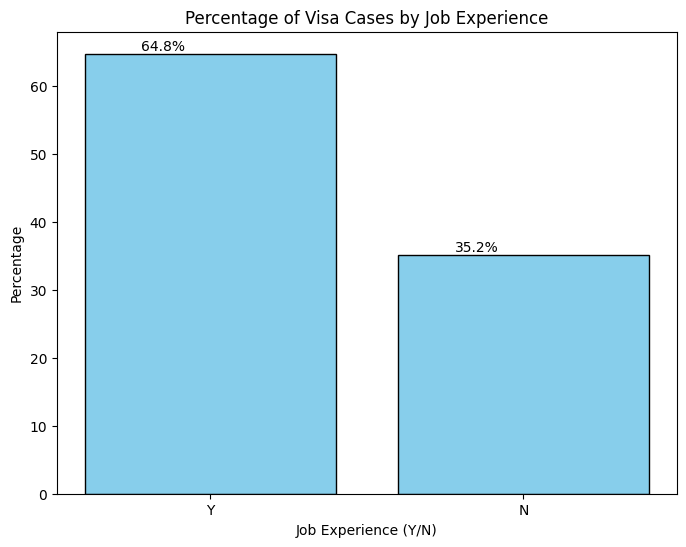

In [ ]:
import matplotlib.pyplot as plt

# Round the percentages to one decimal place
rounded_percentages = percentage_has_job_experience.round(1)

# Plot a bar chart with rounded percentages
plt.figure(figsize=(8, 6))
bars = plt.bar(rounded_percentages.index, rounded_percentages, color='skyblue', edgecolor='black')

# Display percentages on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%', ha='center', color='black', fontsize=10)

plt.title('Percentage of Visa Cases by Job Experience')
plt.xlabel('Job Experience (Y/N)')
plt.ylabel('Percentage')
plt.show()

# It is evidently clear that those with job experience will got the bulk of the visa than those without work experience, thus work experience influence visa status.

# In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

Text(0, 0.5, 'Frequency')

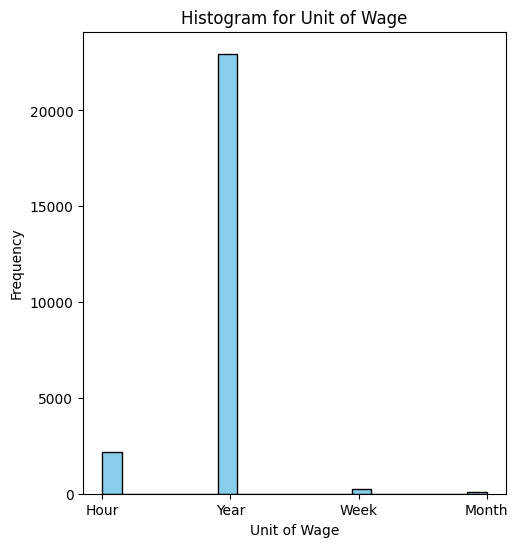

In [ ]:
import matplotlib.pyplot as plt

# The unit_of_wage and prevailing_wage are columns in your DataFrame data
unit_of_wage_values = data['unit_of_wage']
prevailing_wage_values = data['prevailing_wage']

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for unit_of_wage
plt.subplot(1, 2, 1)
plt.hist(unit_of_wage_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Unit of Wage')
plt.xlabel('Unit of Wage')
plt.ylabel('Frequency')


# The unit of wage per year is most likely to be certified for visa

# The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [ ]:
prevailing_wage = data_certified_visa['prevailing_wage'].value_counts()
print(prevailing_wage)

64357.58     2
126813.75    2
100.66       2
82560.28     2
113.60       2
            ..
107395.57    1
68142.63     1
110337.58    1
114777.66    1
70876.91     1
Name: prevailing_wage, Length: 17006, dtype: int64


# Visa certified according to the prevailing wage

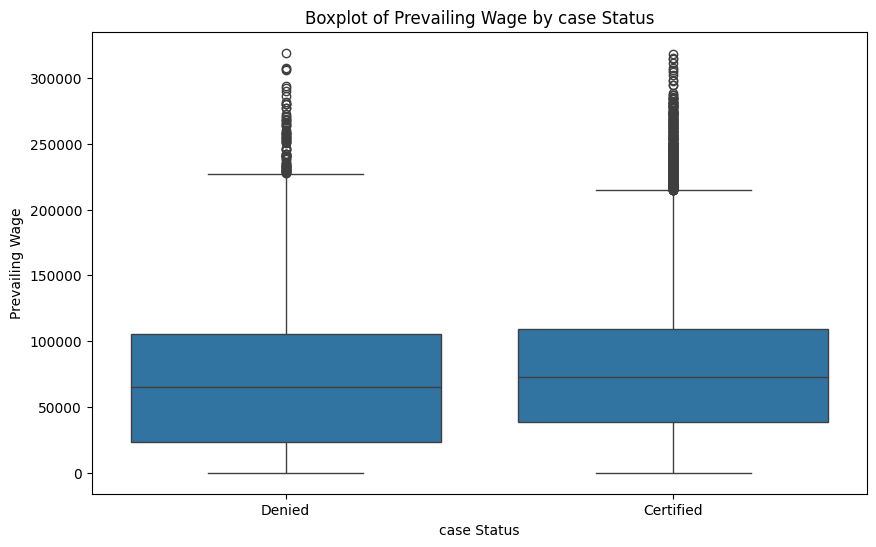

               count          mean           std     min        25%       50%  \
case_status                                                                     
Certified    17018.0  77293.619243  52042.715576  2.1367  38375.330  72486.27   
Denied        8462.0  68748.681580  53890.166031  2.9561  23497.295  65431.46   

                     75%        max  
case_status                          
Certified    108879.1075  318446.05  
Denied       105097.6400  319210.27  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# case_status and prevailing_wage are columns in my DataFrame data
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='case_status', y='prevailing_wage', data=visa)
plt.title('Boxplot of Prevailing Wage by case Status')
plt.xlabel('case Status')
plt.ylabel('Prevailing Wage')

plt.show()

# Summary statistics
summary_stats = visa.groupby('case_status')['prevailing_wage'].describe()
print(summary_stats)

# For Certified Applicants:

# The median, 50th percentile prevailing wage is approximately $72,486.27
# The interquartile range (IQR) starts from $38,375 to $108,879.
# The minimum prevailing wage is $2,136.7, and the maximum prevailing wage is $318,446.05.

# For Denied Applicants:
# The median 50th percentile prevailing wage is approximately $65,431.46
# The interquartile range (IQR) is from $23,497.30 to $105,097.64.
# The minimum prevailing wage is $2,956.10, and the maximum prevailing wage is $319,210.27.

# Explanation:
#The median prevailing wage for Certified cases is higher than the Denied cases, suggesting that, on average, cases with higher prevailing wages are more likely to be certified.

# The IQR gives a range where the majority of prevailing wages fall. Certified cases have a wider IQR, indicating more variability in prevailing wages compared to Denied cases.
# The maximum prevailing wage for Certified cases is slightly lower than that for Denied cases, but the overall distribution for Certified cases is spread over a wider range.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

# There are no missing values in the data set

In [ ]:
print(data.columns)

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


# Checking for the negative values in number of employees columns and fixing them.

#There are 33 rows and 12 columns with the number of employee with negative

# To Take the absolute values for number of employees see below the code to give us the numbers that are positive modified no_of_employees column in the DataFrame.


In [ ]:
data.loc[data['no_of_employees'] < 0].shape

(33, 12)

In [ ]:
data['no_of_employees'] = data['no_of_employees'].apply(lambda x: abs(x) if x < 0 else x)

In [ ]:
data.loc[data['no_of_employees'] < 0].shape

(0, 12)

In [ ]:
print(data)

         case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513         2007   
1                        

In [ ]:
print(data.head())

  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.65

# This represent modified DataFrame with the no_of_employees column containing only positive values.
# Has more of no job experience for bachelors degree holders from Asia, have more applicant who need job training at the western part region of employment, those denied of visa constitute a hand full of applicant than those certified

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

In [ ]:
import pandas as pd

# Assuming data has been created and manipulated
# Convert all object columns to categories
data = data.astype('object')

# Making a list of all categorical variables
cat_col = list(data.select_dtypes(include=['object', 'category']).columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
183      18
854      16
724      16
766      15
1476     15
         ..
5876      1
5536      1
47866     1
4700      

In [ ]:
data['case_id'].unique()

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

# Checking for unique values

In [ ]:
# Calculate the number of unique values in each column
unique_counts = data.nunique()

# Report the uniqueness of each label
for column_name, count in unique_counts.items():
    print(f"Column '{column_name}' has {count} unique values.")

Column 'case_id' has 25480 unique values.
Column 'continent' has 6 unique values.
Column 'education_of_employee' has 4 unique values.
Column 'has_job_experience' has 2 unique values.
Column 'requires_job_training' has 2 unique values.
Column 'no_of_employees' has 7105 unique values.
Column 'yr_of_estab' has 199 unique values.
Column 'region_of_employment' has 5 unique values.
Column 'prevailing_wage' has 25454 unique values.
Column 'unit_of_wage' has 4 unique values.
Column 'full_time_position' has 2 unique values.
Column 'case_status' has 2 unique values.


# The above computation is to count the number of unique values in each column
# it is a convenient way to assess the variety or the fundamentals of data within each column of a DataFrame. The case_id identifier has 25480 unique values followed by others. This gives a better understanding of the data structure.

# I am droping case_id because is irrelevant in this used case

In [ ]:
data.drop(["case_id"], axis=1, inplace=True)

# EDA. It is a good idea to explore the data once again after manipulating it.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# Univariate Analysis

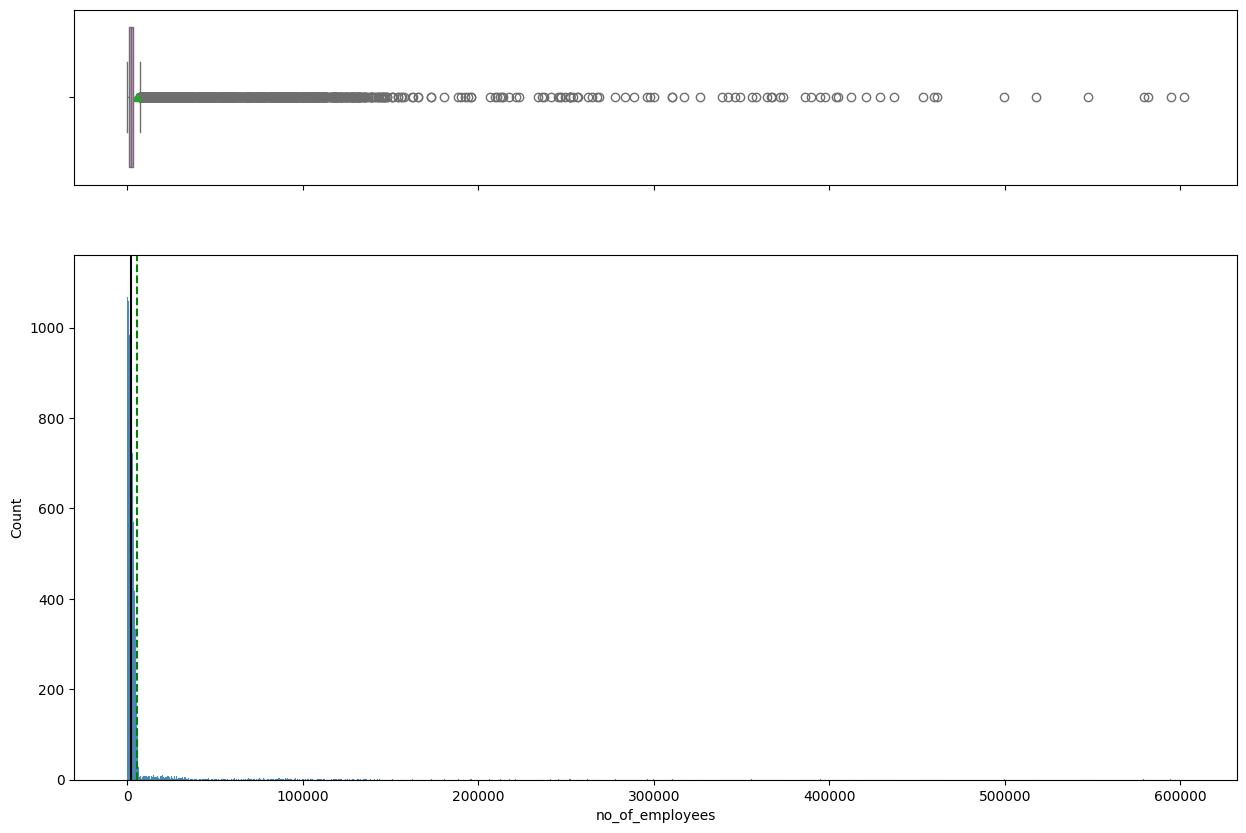

In [ ]:
histogram_boxplot(data, "no_of_employees")

# The above histogram shows significant outliers and is positively skewned to the right also with a higher mean compared to the median

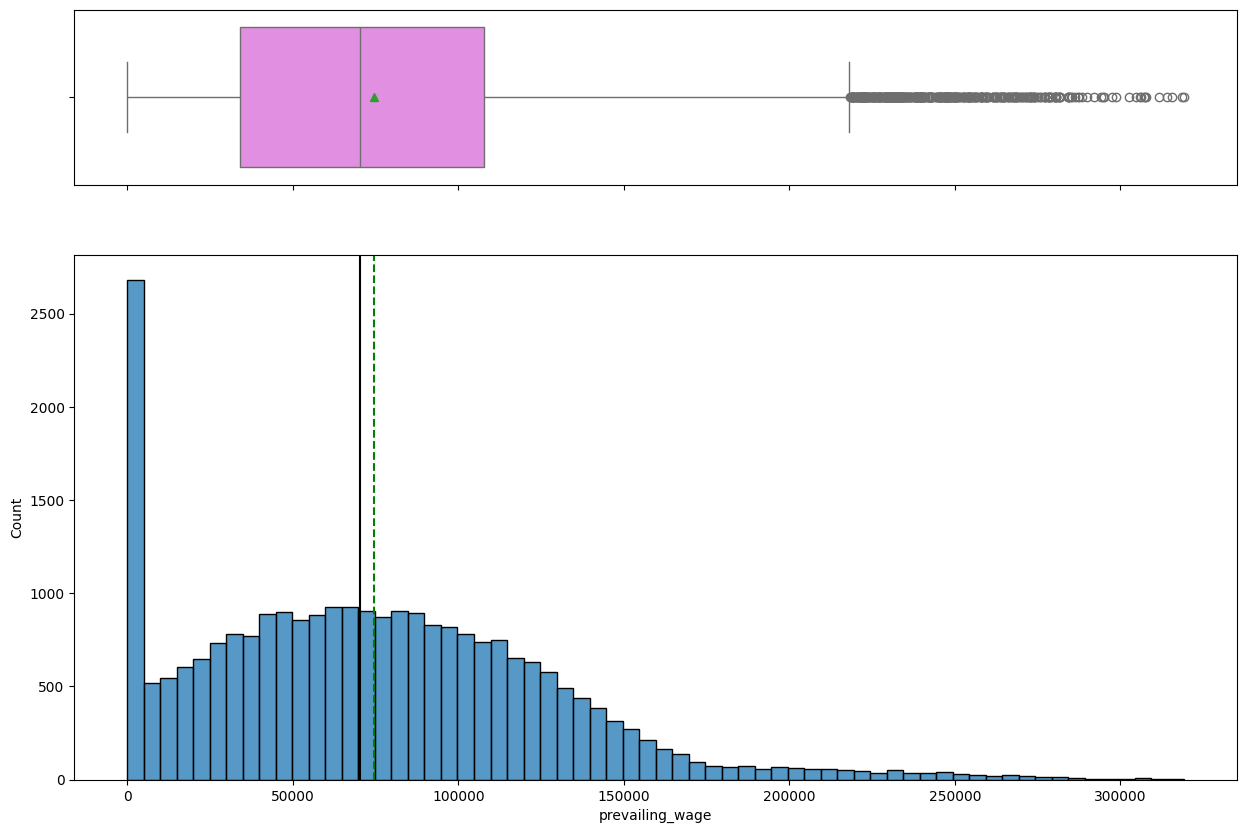

In [ ]:
histogram_boxplot(data, 'prevailing_wage')

# The computation is postively skewed to the right with moderate outliers

In [ ]:
#  To check for the observations which have less than 100 prevailing wage
data.loc[data['prevailing_wage'] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


# To get the count of the values in the mentioned column

In [ ]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

# The above result shows that all the entries have Hour as the unit of wage for prevailing wages less than 100 hence, the prevailing wages below 100 are precisely reported in terms of hourly wages.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Observation on continents

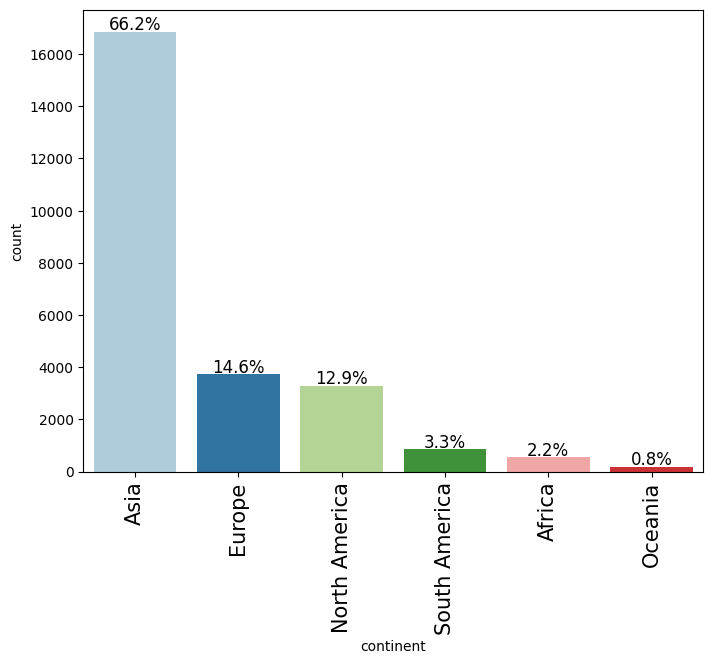

In [ ]:
labeled_barplot(data, "continent", perc=True)

# Asians are most awarded the visa

# Observation on Employee

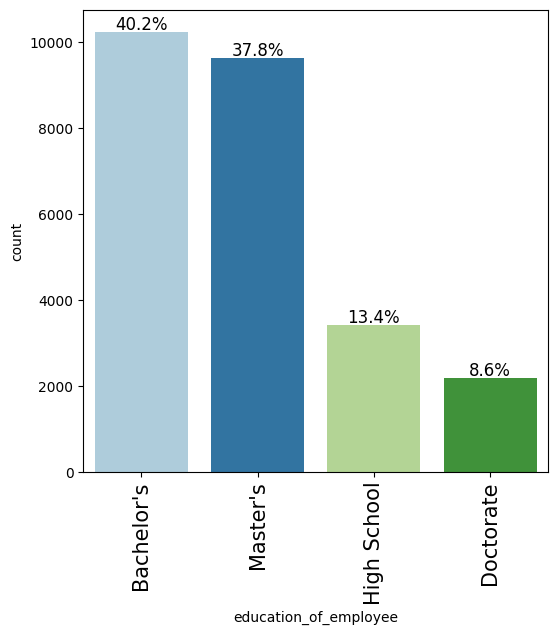

In [ ]:
labeled_barplot(data, 'education_of_employee', perc=True)

# The bachelor's degree top the list of employees based on educational status

# Observations on job experience

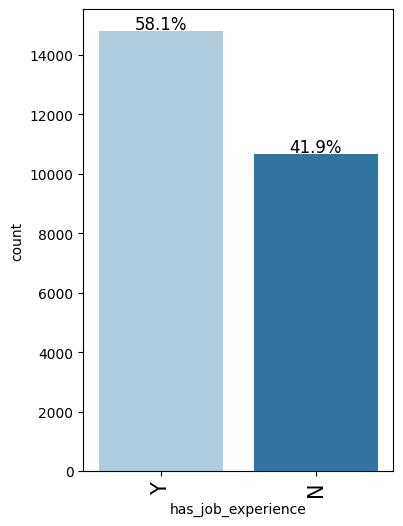

In [ ]:
labeled_barplot(data, 'has_job_experience', perc=True)

# The experienced wokers are easily given visa than the inexperience workers

# Observations on job training

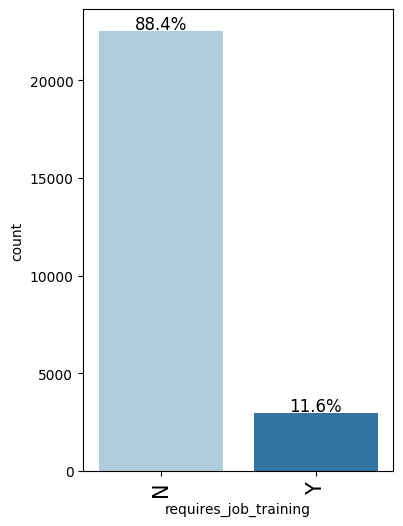

In [ ]:
labeled_barplot(data, 'requires_job_training', perc=True)

# The applicants who does not need training are more than those who need be trained for their various area of interest

# Observations on region of employment

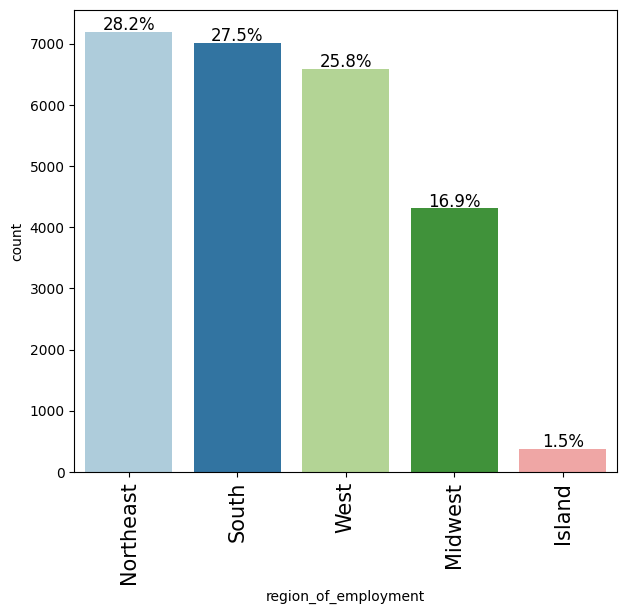

In [ ]:
labeled_barplot(data, 'region_of_employment', perc=True)

# Region of employment is dominated by Northeast area compared to others

# Observations on unit of wage

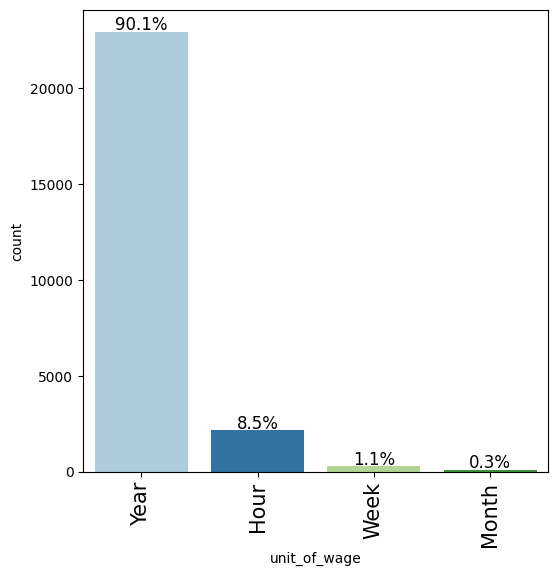

In [ ]:
labeled_barplot(data, 'unit_of_wage', perc=True)

# The unit of wage per year is preferable for quick access to the visa of employment

# Observations on case status

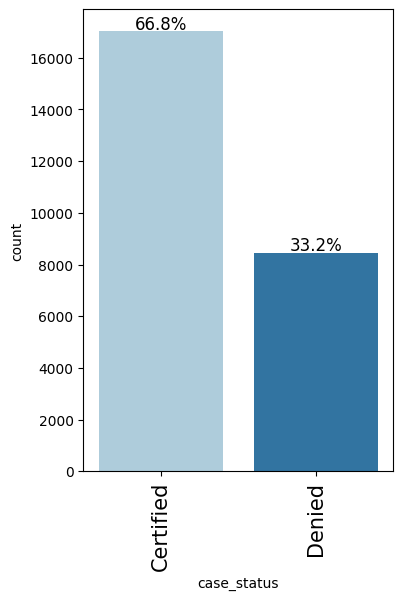

In [ ]:
labeled_barplot(data, 'case_status', perc=True)

# 66% certified and 33.2 denied generally.

# Bivariate Analysis

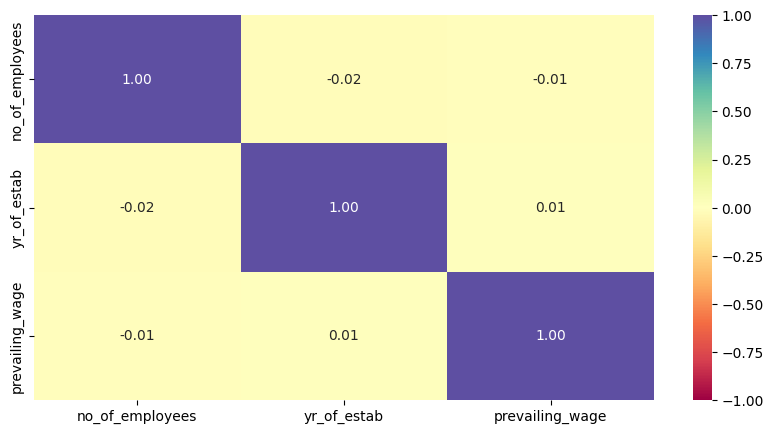

In [ ]:
cols_list = visa.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    visa[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

# There is not any correlation here.

# Creating functions that will help us with further analysis.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


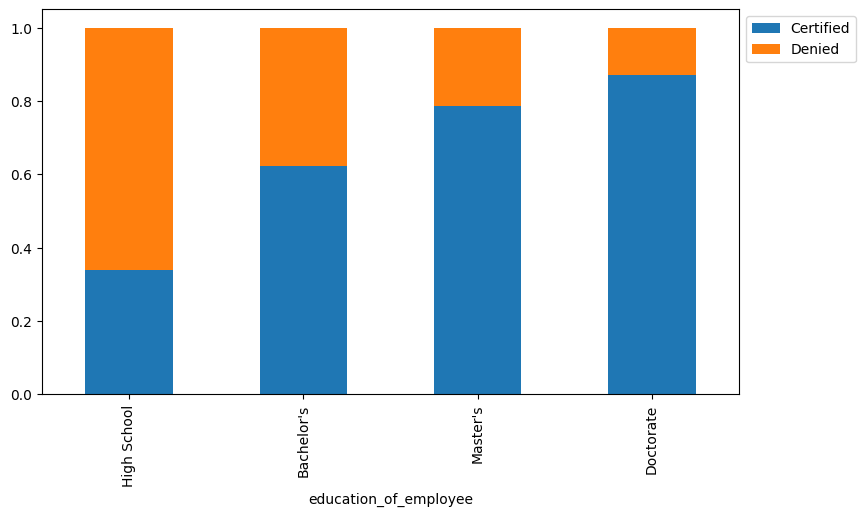

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

# The above stacked barplot shows that the master's holders have the highest visa issued and it has the highest denied visa while others follows

# Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

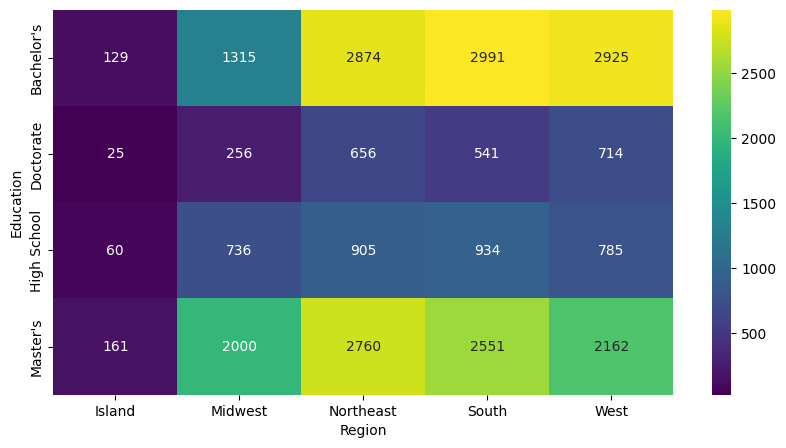

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis"
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

# The heatmap is showing the correlation between the emloyee education and the region of employment. The above showed the highest numbers of employee in each region, and and in order of importance first amongst them is Master's, bachelors, doctorate and finally the last but not the leaset is higher school certificate

# Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


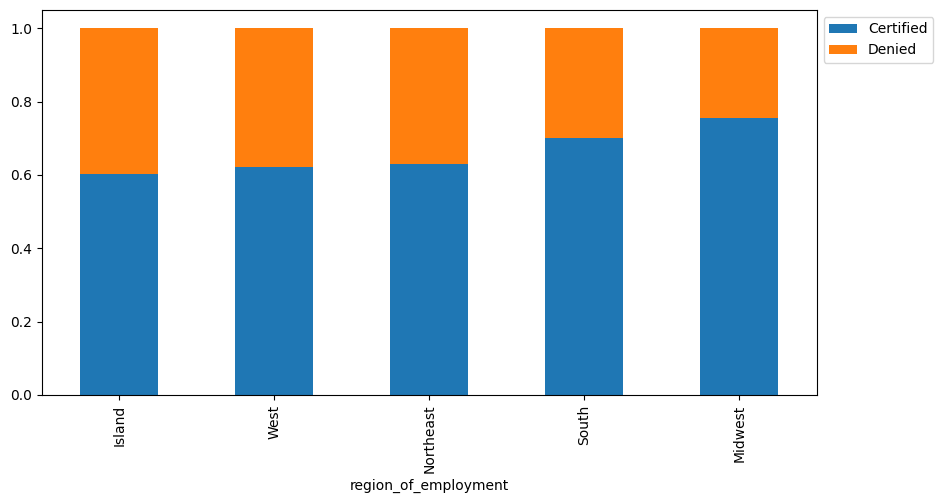

In [ ]:
stacked_barplot(data, 'region_of_employment', 'case_status')

# The relationship between region of employment and visa certification and denial is displayed above, the more certified egion has the highest denials

# Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


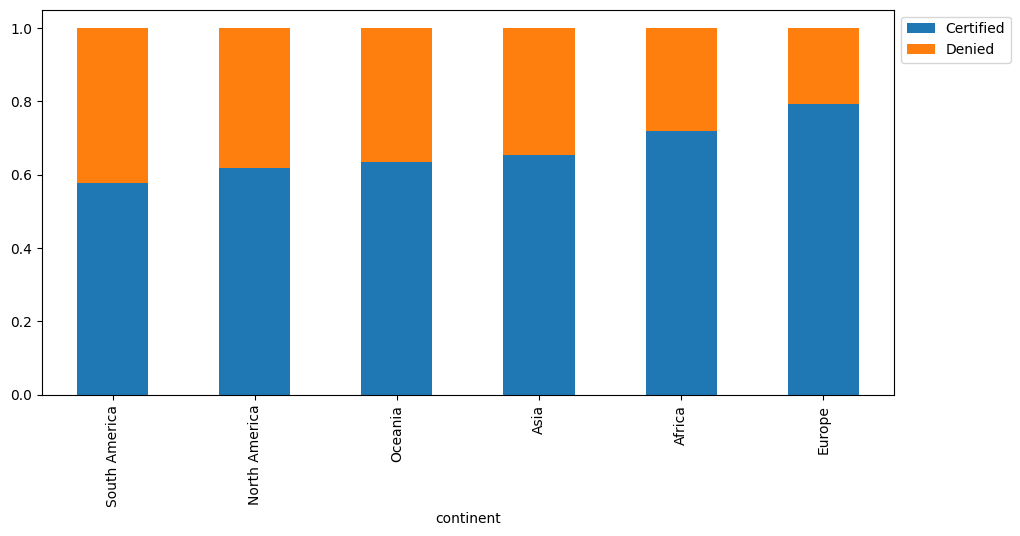

In [ ]:
stacked_barplot(data, 'continent', 'case_status')

# The relationship between continent and case_status, certified  and denial is displayed above, the more certified continent has the highest denials

# Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


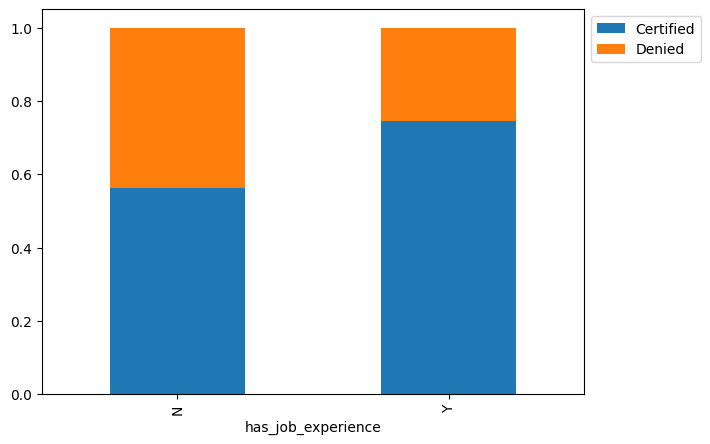

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status')

# The applicant with job experience are employed most and they easily get their visa

# Do the employees who have prior work experience require any job training?

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


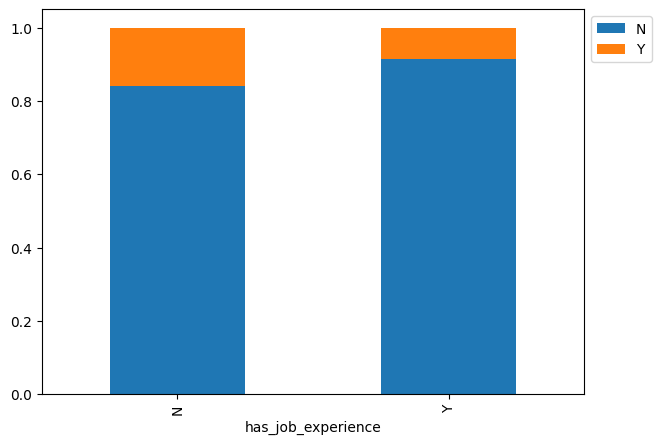

In [ ]:
stacked_barplot(data,'has_job_experience', 'requires_job_training')

# The applicants with job experience are more in numbers than those without job experience meaning experience play a vital role in getting job as well as getting visa faster

# The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

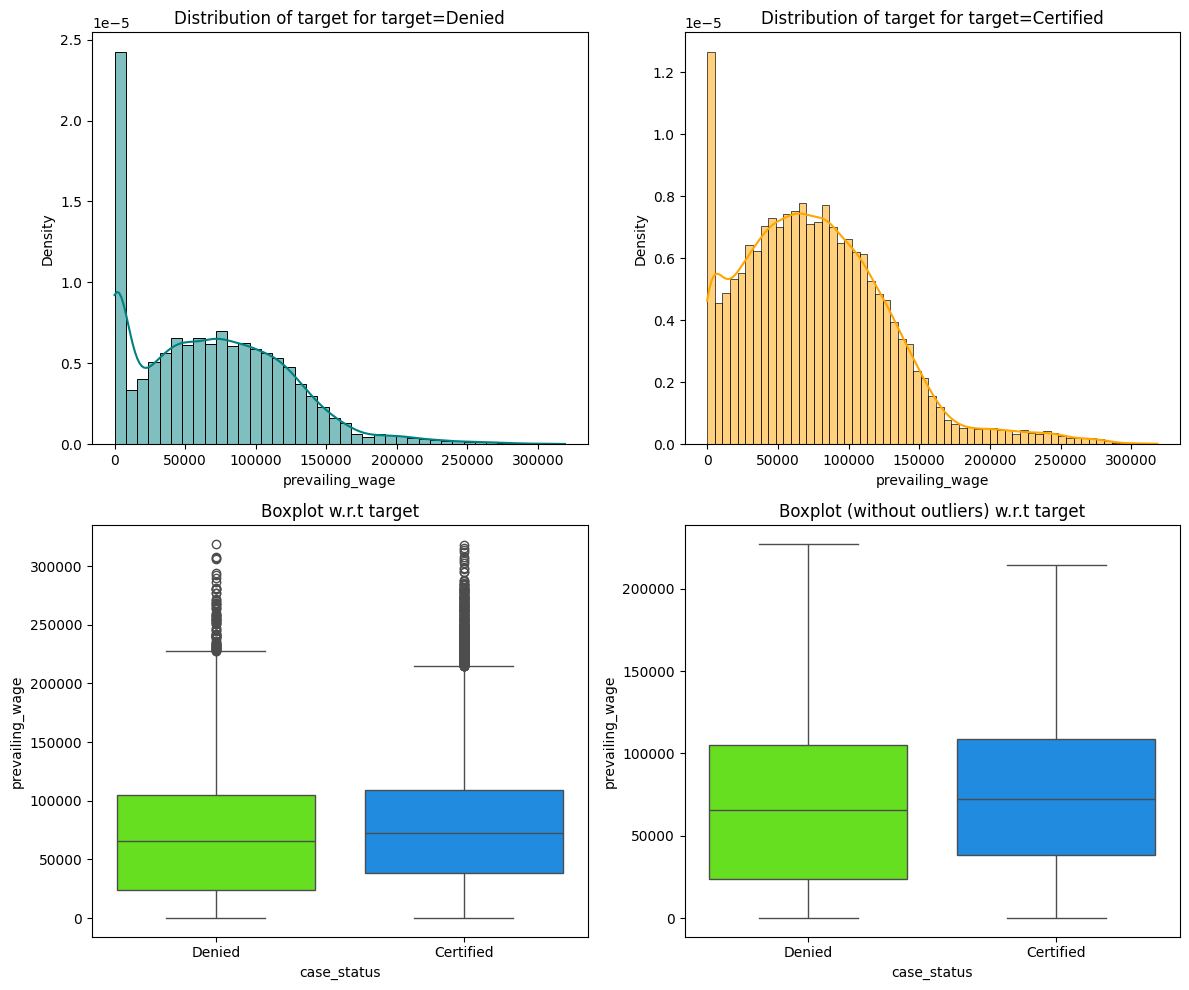

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

# As we can obseve the visa status changes with the prevailing wage

# Checking if the prevailing wage is similar across all the regions of the US

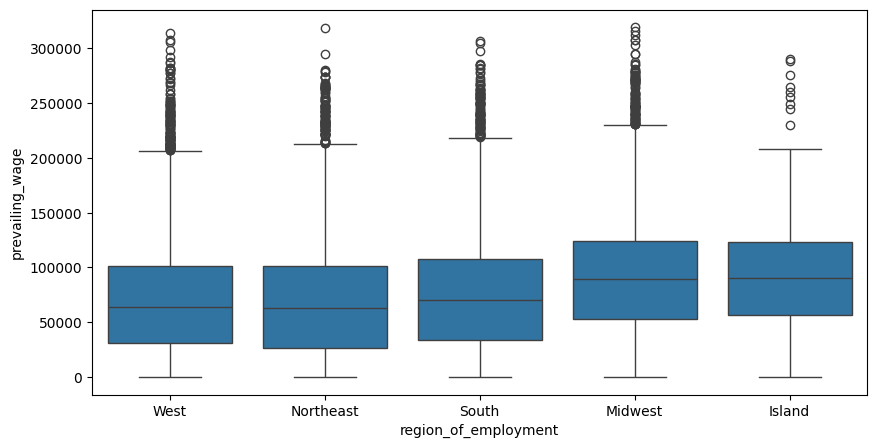

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='region_of_employment', y='prevailing_wage') ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

# The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


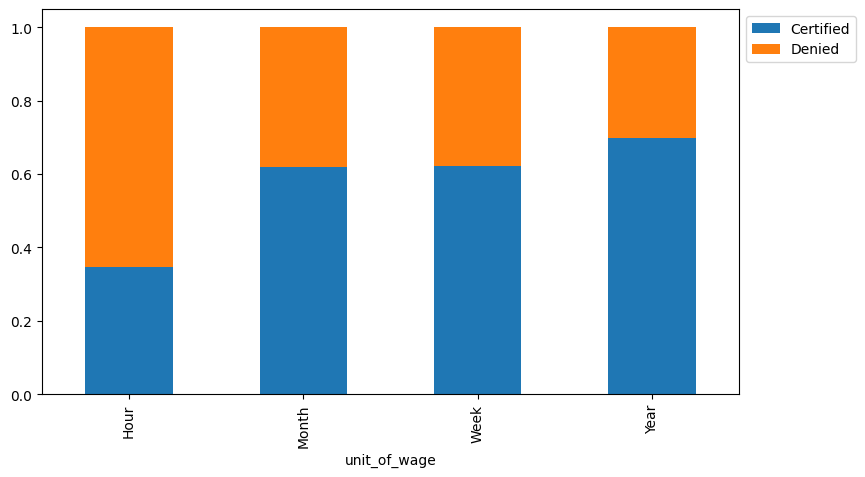

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

# The relationship between unit of wage and case_status is displayed above, the more certified the unit of wage has the highest denials

# Data Preprocessing

# Outlier Check Let's check for outliers in the data.

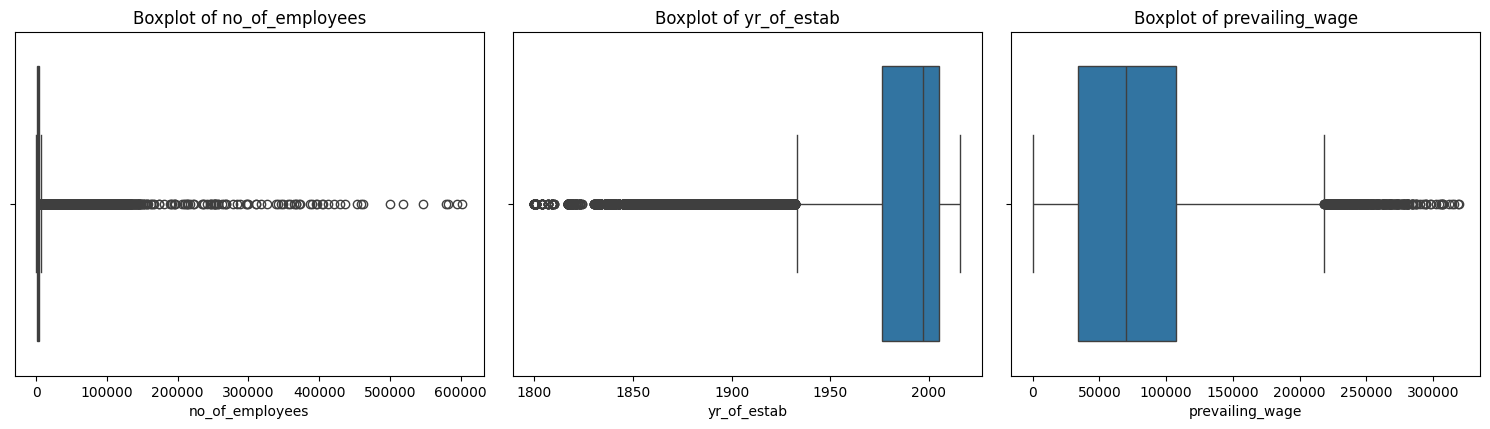

In [ ]:
numeric_columns = visa.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)  # Adjust the subplot grid based on the number of numeric columns
    sns.boxplot(x=data[variable])
    plt.title(f'Boxplot of {variable}')

plt.tight_layout()
plt.show()

# All the boxplot have outliers both positively and negative skews

# Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

# The below code is the drop case status from X axis and enable it in the Y axis, however, case status is our depndent variable

# Here I also create dumies for X

In [ ]:
visa["case_status"] = visa["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = visa.drop(["case_status"], axis=1)
Y = visa["case_status"]


X = pd.get_dummies(X,drop_first=True)  ## Complete the code to create dummies for X


# Complete the code to split the data into train and test in the ratio 70:30

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)
print(X_train.shape, X_test.shape)

(17836, 25500) (7644, 25500)


# This indicate only one unique value is present in the Series, and that value is 0.

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 25500)
Shape of test set :  (7644, 25500)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


# Model evaluation criterion

# Model can make wrong predictions as: Hypothesis

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

# How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

*First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Decision Tree - Model Building and Hyperparameter Tuning

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier
model = DecisionTreeClassifier(random_state=1)

# Fit the decision tree classifier on the train data (X_train, y_train)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

# Checking model performance on training set

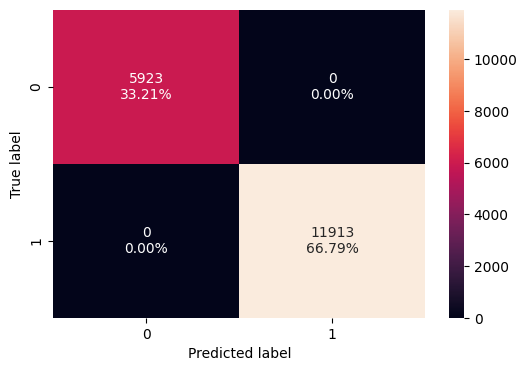

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

# Checking model performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


# This is a highly significant overfit

# Checking model performance on test set

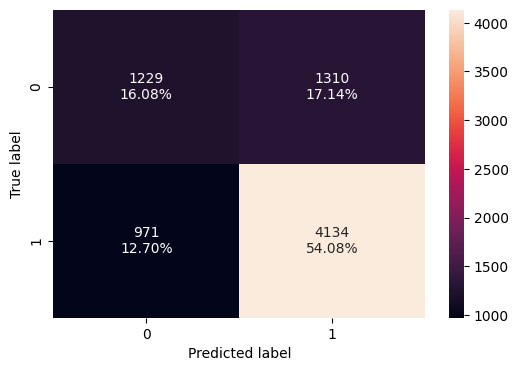

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.701596,0.809794,0.759368,0.783771


# Overfitting: The perfect scores on both training set (Accuracy, Recall, Precision, and F1 are all equivalent to 1.0) meaning that the model has retained the training data but may not generalize well to unseen data. a very good indication that the training model is overfitting.

# On the other hand the Test Set Performance scores are lower side, suggesting that the model may not be generalizing well to new, unseen data. This is seen in the lower values for Accuracy, Recall, Precision, and F1 respectively.

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

# Hyperparameter Tuning - Decision Tree

##  Will tuning the hyperparameters improve the model performance? well a trial will convince us but lets try.

In [ ]:
%%time
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

CPU times: user 17min 41s, sys: 3min 15s, total: 20min 57s
Wall time: 21min 17s


DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

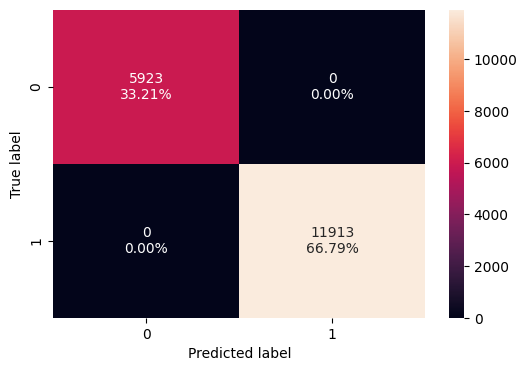

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


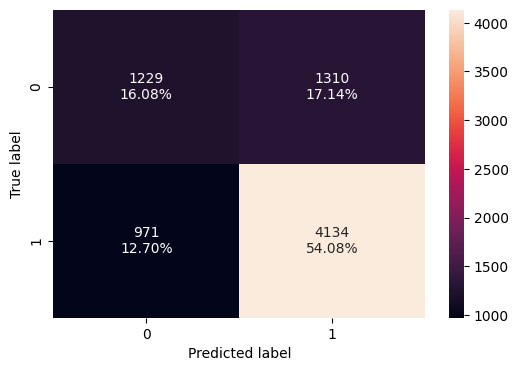

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance for test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.701596,0.809794,0.759368,0.783771


# Hyperparameter turning not a better option here so let us try Bagging.

# Bagging - Model Building and Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Define Bagging Classifier
bagging_classifier = BaggingClassifier(random_state=1)

# Fit the Bagging Classifier on the training data
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

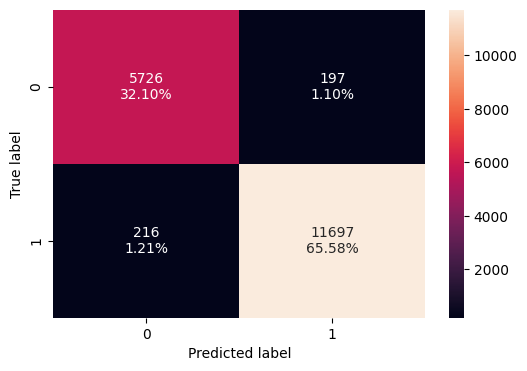

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.976845,0.981869,0.983437,0.982652


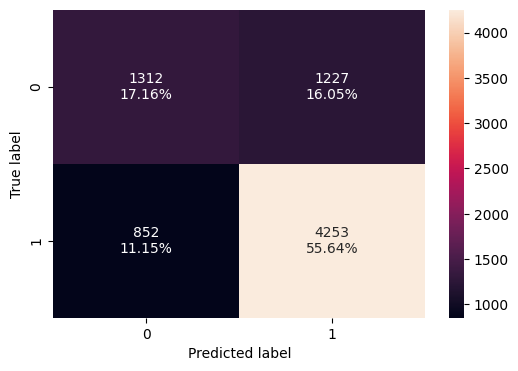

In [ ]:
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [ ]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.728022,0.833105,0.776095,0.80359


In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5, 0.7, 1],
    "n_estimators": np.arange(50, 110, 25),
}

# Type of scoring used to compare parameter combinations
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=f1_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

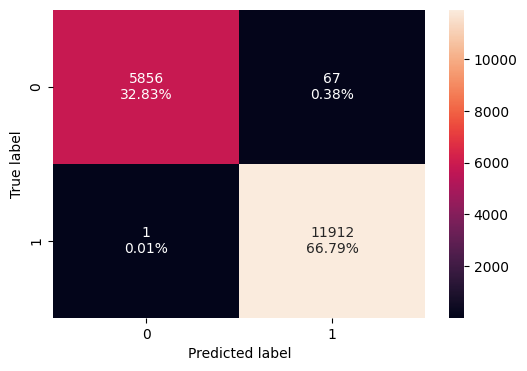

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


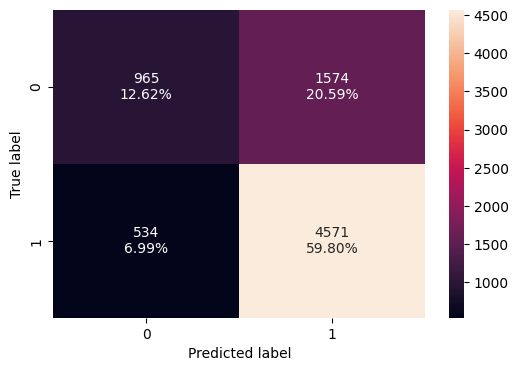

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test) ## Complete the code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


# Bagging failed to correct current ongoing overfitting hence we try the random forest.

In [ ]:
rf_estimator = RandomForestClassifier(random_state=1, class_weight='balanced')

# Fit Random Forest on the training data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

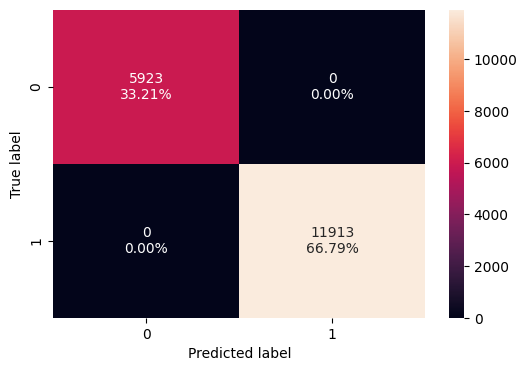

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


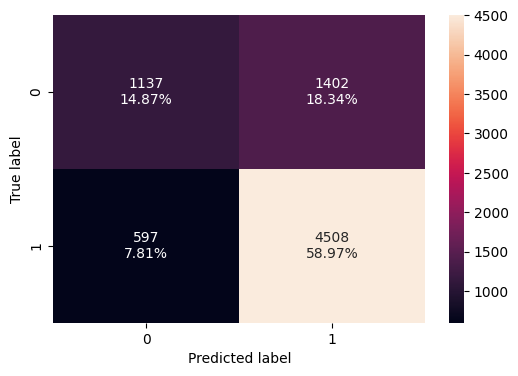

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738488,0.883056,0.762775,0.81852


# Training Accuracy vs. Test Accuracy:

#The training accuracy is higher than the test accuracy, which is expected. It's common for models to perform better on the data they were trained on compared to unseen data.
# A large gap between training and test accuracy might indicate some degree of overfitting, but the difference here is not extreme.
# Recall, Precision, and F1 Score:

# Recall, precision, and F1 scores on the training set are generally higher than those on the test set. This is consistent with the overall accuracy trends.
# It's crucial to consider the balance between precision and recall based on the specific requirements of your project.
# Overall Model Evaluation:

# The model performs well on both the training and test sets, achieving high scores in accuracy, recall, precision, and F1.
#The test set performance is reasonably close to the training set, suggesting that the model generalizes well to new, unseen data.

# Not satisfied with present result i want to further fine tune with XGBoost (Extreme Gradient Boosting)

# Hyperparameter Tuning - Random Forest

In [ ]:
 #Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=f1_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

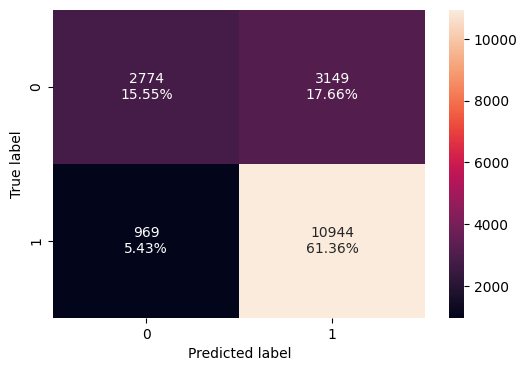

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


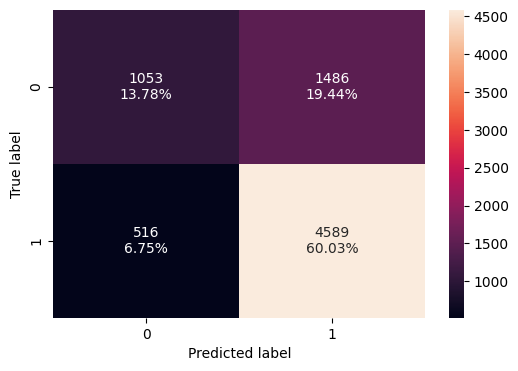

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define AdaBoost Classifier
ab_classifier = AdaBoostClassifier(random_state=1)

# Fit the AdaBoost Classifier on the training data
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

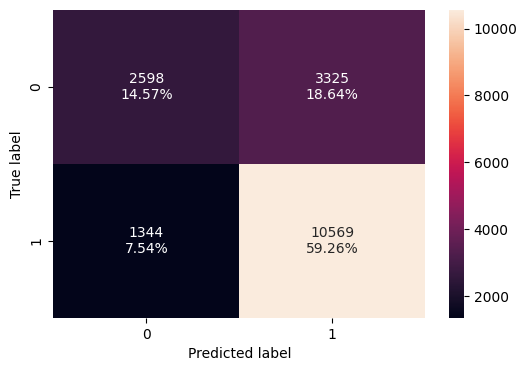

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


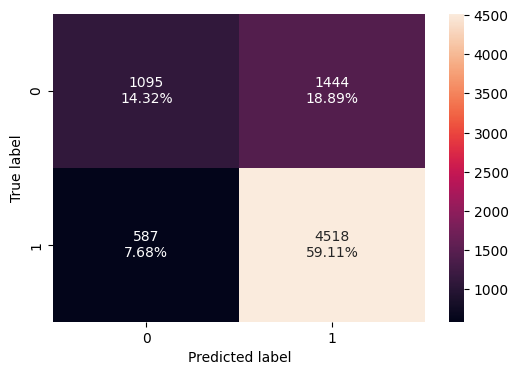

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

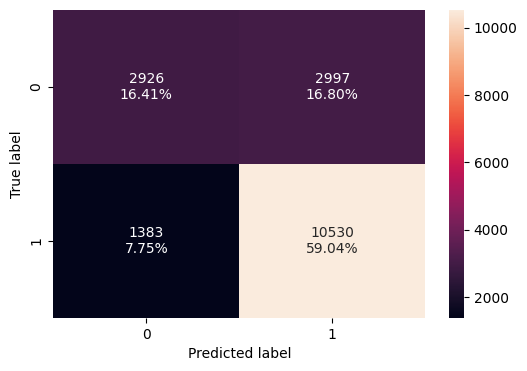

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754429,0.883908,0.778443,0.82783


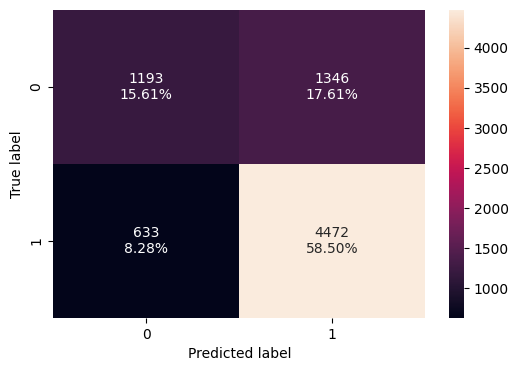

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.741104,0.876004,0.768649,0.818823


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define Gradient Boosting Classifier with random state = 1
gb_classifier = GradientBoostingClassifier(random_state=1)

# Fit Gradient Boosting Classifier on the train data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

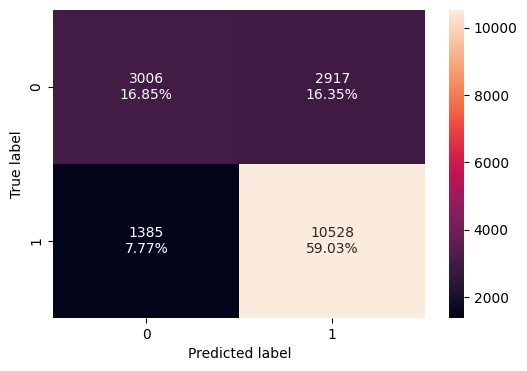

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


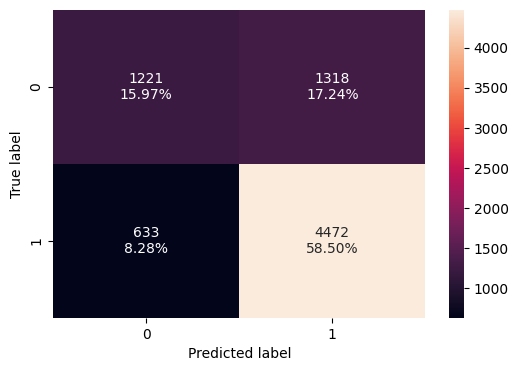

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


# Hyperparameter Tuning - Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 110, 25),
    "subsample": [0.7, 0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=50, random_state=1,
                           subsample=0.9)

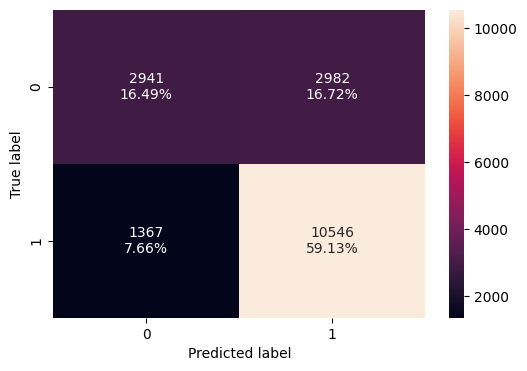

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756167,0.885251,0.779568,0.829055


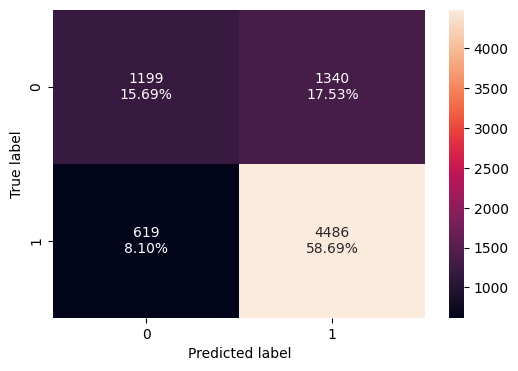

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743721,0.878746,0.769997,0.820785


# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

# Define XGBoost Classifier with random state = 1
xgb_classifier = XGBClassifier(random_state=1)

# Fit XGBoost Classifier on the train data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

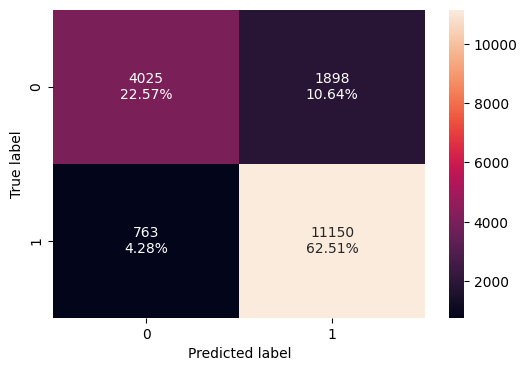

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.850807,0.935952,0.854537,0.893394


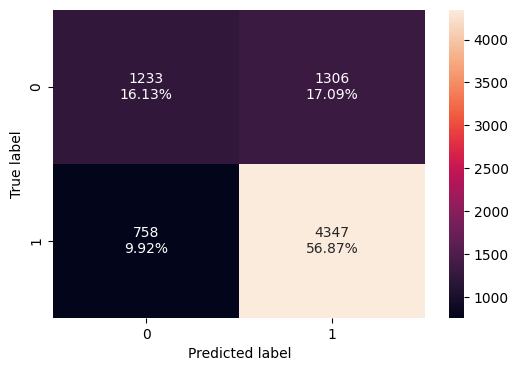

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.729984,0.851518,0.768972,0.808143


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50, 110, 25),
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01, 0.1, 0.05],
    "gamma": [1, 3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

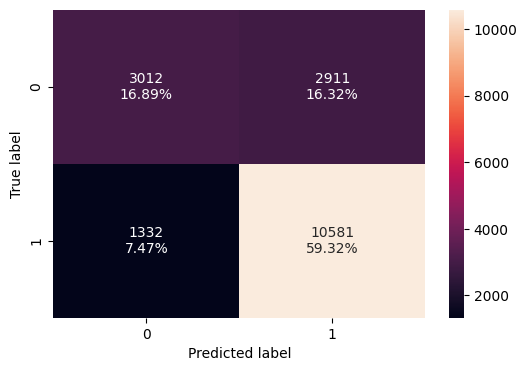

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76211,0.888189,0.784243,0.832986


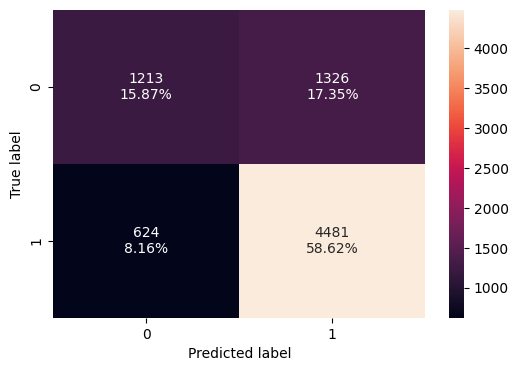

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.877767,0.771655,0.821298


# Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

# Choose the type of classifier.
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Fit the stacking classifier on the train data.
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1))]...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

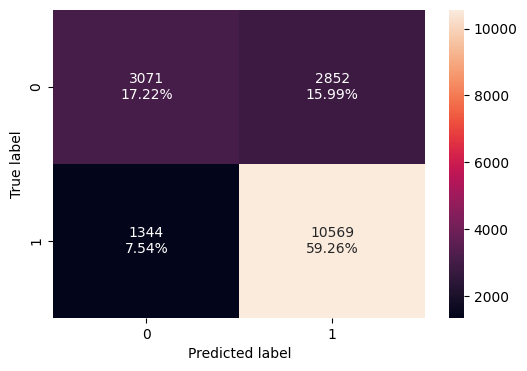

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764745,0.887182,0.787497,0.834373


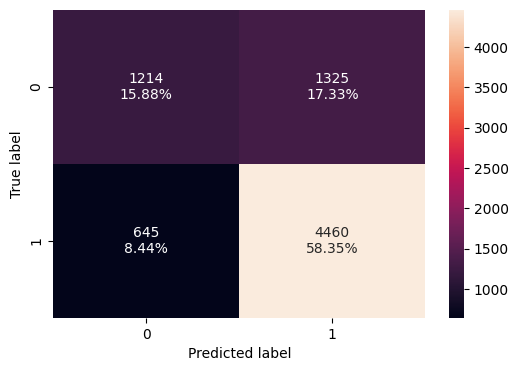

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

## Model Performance Comparison and Conclusions

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742282,0.873653,0.770959,0.8191


# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T,
     bagging_classifier_model_train_perf.T,
    bagging_estimator_tuned_model_train_perf.T,
     rf_tuned_model_train_perf.T,
     ab_classifier_model_train_perf.T,
    abc_tuned_model_train_perf.T,
     gb_classifier_model_train_perf.T,
     gbc_tuned_model_train_perf.T,
    xgb_classifier_model_train_perf.T,
     stacking_classifier_model_train_perf.T,
    ],
    axis=1
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]

print("Training performance comparison:")
models_train_comp_df


Training performance comparison:


,Decision Tree,Bagging Classifier,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.985198,0.996187,0.769119,0.738226,0.741104,0.758802,0.756167,0.762110,0.764745
Recall,1.0,0.985982,0.999916,0.918660,0.887182,0.876004,0.883740,0.885251,0.888189,0.887182
Precision,1.0,0.991810,0.994407,0.776556,0.760688,0.768649,0.783042,0.779568,0.784243,0.787497
F1,1.0,0.988887,0.997154,0.841652,0.819080,0.818823,0.830349,0.829055,0.832986,0.834373


In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, bagging_classifier_model_test_perf.T,
    bagging_estimator_tuned_model_test_perf.T, rf_tuned_model_test_perf.T, ab_classifier_model_test_perf.T,
    abc_tuned_model_test_perf.T, gb_classifier_model_test_perf.T, gbc_tuned_model_test_perf.T,
    xgb_classifier_model_test_perf.T, stacking_classifier_model_test_perf.T,
    ],
    axis=1
)
models_test_comp_df.columns = [
   "Decision Tree",
    "Bagging Classifier",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]

print("Testing performance comparison:")
models_test_comp_df


Testing performance comparison:


,Decision Tree,Bagging Classifier,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.691523,0.724228,0.738095,0.734301,0.741104,0.744767,0.743721,0.744898,0.742282
Recall,0.742801,0.764153,0.895397,0.898923,0.885015,0.876004,0.876004,0.878746,0.877767,0.873653
Precision,0.752232,0.771711,0.743857,0.755391,0.757799,0.768649,0.772366,0.769997,0.771655,0.770959
F1,0.747487,0.767913,0.812622,0.820930,0.816481,0.818823,0.820927,0.820785,0.821298,0.819100


# Decision tree performed well on training but did not perform well on test set hence, the overfit.
# Bagging classifier overfitted the data before and after tuning combined.
# Random Forest overfitted on the data performed fairly alright after tuning but it was not the best.
# adaboost was much better on both the data and after tunning.
# Gradient boost was better than adaboost but not the best.
# On the final note, the best is XGboost choosen for prediction

# However, there may be a much better parameters which may result in a better performance should we go further.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(gb_classifier.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.285978
has_job_experience_Y               0.155462
prevailing_wage                    0.136663
education_of_employee_Master's     0.087565
education_of_employee_Doctorate    0.083538
continent_Europe                   0.063035
unit_of_wage_Year                  0.036526
region_of_employment_Midwest       0.034432
region_of_employment_South         0.019024
no_of_employees                    0.014866
continent_North America            0.014537
yr_of_estab                        0.014220
region_of_employment_West          0.013583
continent_Asia                     0.011354
full_time_position_Y               0.009000
region_of_employment_Northeast     0.008039
continent_South America            0.007043
requires_job_training_Y            0.004692
continent_Oceania                  0.000311
unit_of_wage_Month                 0.000133
unit_of_wage_Week                  0.000000


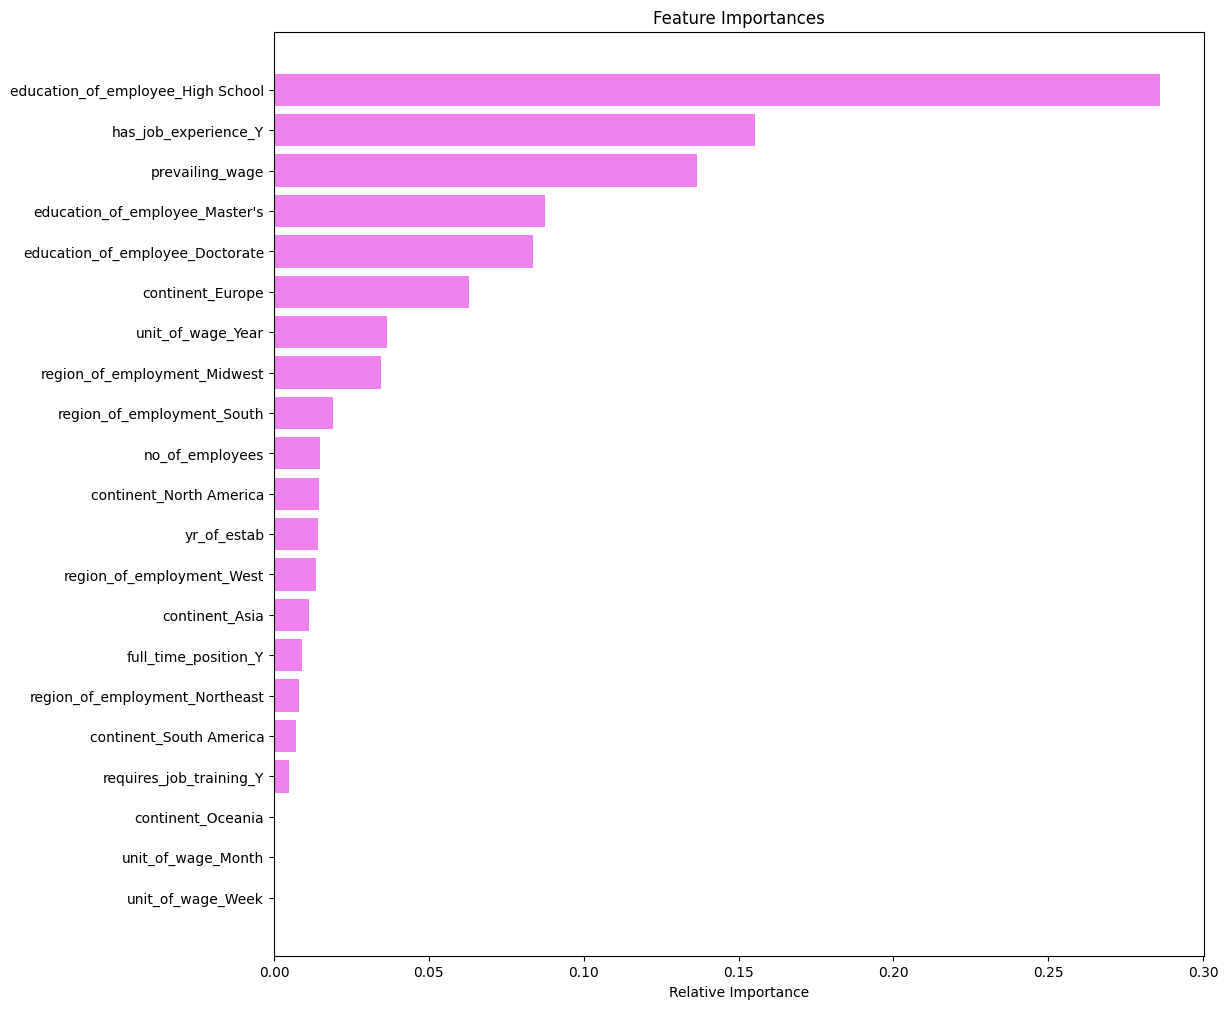

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#. Education of employee_high school is the most significant feature of importance for prediction followed by has_job_experience, prevailing_wage, education_of_employee_masters, and education of employee_doctorate

# Actionable Insights and Recommendations

# I have been able to build a predictive model:
#. To help in shortlisting who have higher chances of 'visa' approval
#. To facilitate the process of 'visa' approvals
#. To make appropriate recommendation of an acceptable profile for the candidate who deserve the visa otherwise denied due to the factors that impact the case_status.

#. Education of employee_high school is the most significant feature of importance for prediction followed by has_job_experience, prevailing_wage, education_of_employee_masters, and education of employee_doctorate

#.Factors that influence 'case_status' are education_of_employee,has_job_experience, require_job_training, prevailing_wage, and unit_of_wage.

#. Education of employee; In this used case the education of employee play a significant role in both aquisition and certification of visa as higher educational status predisposes to a better job offer hence, the tavelling abroad is their priority and with this certification of visa is guaranteed, here masters holders constitute the highest certified visa

#. Those with job experience get their visa approved compared to those without job experience, especially when employes know they have to spend money and resource to train those without experience so I recommend they hire applicants with experience more than those without experience.

#. Continents: Asian continent have the highest certified visa's of 11012, and the least is oceania of 122 certified visa, Asians are more educated which mean they could be highly skilled and hiring them makes organization profitable hence i recommend they be employed much more than other continent.

#. Unit of wage: The pay unit that is likely certified for a visa is the unit of pay per year, this is recommended to avoid frequency in the demand for visa that will involve processess that is demanding financialy leading to finanacial burden to the employer.



